# I Lecture des fichiers excel

## Première tentative de code de lecture

In [84]:
import pandas as pd
import numpy as np
from math import *
import statistics

In [85]:
pip install xlrd


The following command must be run outside of the IPython shell:

    $ pip install xlrd

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [86]:
import xlrd

In [87]:
pres_2012 = xlrd.open_workbook('participation_2012_datagouv.xls')

In [88]:
print("Nombre de feuilles: "+str(pres_2012.nsheets))
print("Nombre de feuilles: "+str(pres_2012.sheet_names()))

Nombre de feuilles: 9
Nombre de feuilles: ['France entière T1T2', 'Régions T1', 'Régions T2', 'Départements T1', 'Départements T2', 'Circo leg T1', 'Circo leg T2', 'Cantons T1', 'Cantons T2']


In [89]:
dep_t1 = pres_2012.sheet_by_name("Départements T1")

In [90]:
print("Format de la feuille 1:")
print("Nom: "+str(dep_t1.name))
print("Nombre de lignes: "+str(dep_t1.nrows))
print("Nombre de colonnes: "+str(dep_t1.ncols))

Format de la feuille 1:
Nom: Départements T1
Nombre de lignes: 108
Nombre de colonnes: 73


In [91]:
cols_dep_t1 = dep_t1.ncols
rows = dep_t1.nrows

N'aboutit pas (je n'arrive pas à me balader dans le fichier excel)

### Deuxième tentative de code de lecture moins puissant

On tire l'abstention par département pour la présidentielle de 2012 au tour 1 et au tour 2

In [92]:
presi_2012 = pd.read_excel('participation_2012_datagouv.xls')

In [93]:
xls = pd.ExcelFile('participation_2012_datagouv.xls')

In [94]:
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [95]:
depa_t1_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T2")

In [96]:
depa_t2_2012.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2012.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)
depa_t2_2012.head()

,Code du département,Libellé du département,Inscrits,Abstentions_t2,% Abs/Ins_t2,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Prénom,Voix,% Voix/Ins,% Voix/Exp,Sexe.1,Nom.1,Prénom.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,393866,67279.0,17.08,326587.0,82.92,19513.0,4.95,5.97,...,François,131333.0,33.34,42.77,M,SARKOZY,Nicolas,175741.0,44.62,57.23
1,2,AISNE,376073,73997.0,19.68,302076.0,80.32,21056.0,5.60,6.97,...,François,147260.0,39.16,52.40,M,SARKOZY,Nicolas,133760.0,35.57,47.60
2,3,ALLIER,256211,45079.0,17.59,211132.0,82.41,14924.0,5.82,7.07,...,François,111615.0,43.56,56.89,M,SARKOZY,Nicolas,84593.0,33.02,43.11
3,4,ALPES DE HAUTE PROVENCE,123895,20314.0,16.40,103581.0,83.60,6639.0,5.36,6.41,...,François,49498.0,39.95,51.06,M,SARKOZY,Nicolas,47444.0,38.29,48.94
4,5,HAUTES ALPES,106875,17470.0,16.35,89405.0,83.65,6025.0,5.64,6.74,...,François,42435.0,39.71,50.89,M,SARKOZY,Nicolas,40945.0,38.31,49.11


In [97]:
df1_2012 = depa_t1_2012[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2012 = depa_t2_2012[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2012 = pd.concat([df1_2012,df2_2012], axis = 1)
depa_t1t2_2012['Année'] = 2012
depa_t1t2_2012['Abs_nat_t1'] = (depa_t1t2_2012['Abstentions_t1'].sum()*100) / depa_t1t2_2012['Inscrits'].sum()
depa_t1t2_2012['Abs_nat_t2'] = (depa_t1t2_2012['Abstentions_t2'].sum()*100) / depa_t1t2_2012['Inscrits'].sum()
depa_t1t2_2012['Abs_nat'] = statistics.mean([depa_t1t2_2012['Abs_nat_t1'][0], depa_t1t2_2012['Abs_nat_t2'][0]])
depa_t1t2_2012.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,AIN,65996.0,16.76,393808.0,67279.0,17.08,2012,20.518015,19.661709,20.089862
1,2,AISNE,72928.0,19.39,376068.0,73997.0,19.68,2012,20.518015,19.661709,20.089862
2,3,ALLIER,45266.0,17.66,256275.0,45079.0,17.59,2012,20.518015,19.661709,20.089862
3,4,ALPES DE HAUTE PROVENCE,21034.0,16.97,123933.0,20314.0,16.40,2012,20.518015,19.661709,20.089862
4,5,HAUTES ALPES,18246.0,17.07,106865.0,17470.0,16.35,2012,20.518015,19.661709,20.089862


On tire l'abstention de 2017 au tour 1 et au tour 2

In [98]:
pres_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls')
pres_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls')

In [99]:
xls_1 = pd.ExcelFile('participation_2017_tour1_datagouv.xls')
xls_2 = pd.ExcelFile('participation_2017_tour2_datagouv.xls')

In [100]:
print(xls_1.sheet_names)
print(xls_2.sheet_names)

['FE Metro OM Tour 1', 'Régions Tour 1', 'Départements Tour 1', 'Circo. Leg. Tour 1', 'Canton Tour 1']
['FE Metro OM Tour 2', 'Régions Tour 2', 'Départements Tour 2', 'Circo. Leg. Tour 2', 'Canton Tour 2']


In [101]:
depa_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls', sheet_name = "Départements Tour 1")
depa_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls', sheet_name = "Départements Tour 2")
depa_t1_2017.head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,Prénom.9,Voix.9,% Voix/Ins.9,% Voix/Exp.9,Sexe.10,Nom.10,Prénom.10,Voix.10,% Voix/Ins.10,% Voix/Exp.10
0,1,Ain,415886,81507,19.60,334379,80.40,6342,1.52,1.90,...,Nathalie,1842,0.44,0.57,M,CHEMINADE,Jacques,595,0.14,0.18
1,2,Aisne,375752,80183,21.34,295569,78.66,5047,1.34,1.71,...,François,2171,0.58,0.75,M,CHEMINADE,Jacques,536,0.14,0.19
2,3,Allier,253508,54275,21.41,199233,78.59,4335,1.71,2.18,...,François,1422,0.56,0.74,M,CHEMINADE,Jacques,353,0.14,0.18
3,4,Alpes-de-Haute-Provence,126578,24323,19.22,102255,80.78,1808,1.43,1.77,...,Nathalie,521,0.41,0.52,M,CHEMINADE,Jacques,205,0.16,0.21
4,5,Hautes-Alpes,109907,20821,18.94,89086,81.06,1541,1.40,1.73,...,Nathalie,411,0.37,0.47,M,CHEMINADE,Jacques,165,0.15,0.19


In [102]:
depa_t2_2017.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2017.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [103]:
df1_2017 = depa_t1_2017[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2017 = depa_t2_2017[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2017 = pd.concat([df1_2017,df2_2017], axis = 1)
depa_t1t2_2017['Année'] = 2017
depa_t1t2_2017['Abs_nat_t1'] = (depa_t1t2_2017['Abstentions_t1'].sum()*100) / depa_t1t2_2017['Inscrits'].sum()
depa_t1t2_2017['Abs_nat_t2'] = (depa_t1t2_2017['Abstentions_t2'].sum()*100) / depa_t1t2_2017['Inscrits'].sum()
depa_t1t2_2017['Abs_nat'] = statistics.mean([depa_t1t2_2017['Abs_nat_t1'][0], depa_t1t2_2017['Abs_nat_t2'][0]])
depa_t1t2_2017.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,Ain,81507,19.60,415886,93130,22.39,2017,22.231967,25.432557,23.832262
1,2,Aisne,80183,21.34,375752,90745,24.15,2017,22.231967,25.432557,23.832262
2,3,Allier,54275,21.41,253508,59294,23.39,2017,22.231967,25.432557,23.832262
3,4,Alpes-de-Haute-Provence,24323,19.22,126578,29255,23.13,2017,22.231967,25.432557,23.832262
4,5,Hautes-Alpes,20821,18.94,109907,24895,22.65,2017,22.231967,25.432557,23.832262


On tire l'abstention de 2007 au tour 1 et au tour 2

In [104]:
pres_2007 = pd.read_excel('participation_2007_datagouv.xls')

In [105]:
xls = pd.ExcelFile('participation_2007_datagouv.xls')
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [106]:
depa_t1_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T2")
depa_t2_2007.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2007.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [107]:
df1_2007 = depa_t1_2007[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2007 = depa_t2_2007[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2007 = pd.concat([df1_2007,df2_2007], axis = 1)
depa_t1t2_2007['Année'] = 2007
depa_t1t2_2007['Abs_nat_t1'] = (depa_t1t2_2007['Abstentions_t1'].sum()*100) / depa_t1t2_2007['Inscrits'].sum()
depa_t1t2_2007['Abs_nat_t2'] = (depa_t1t2_2007['Abstentions_t2'].sum()*100) / depa_t1t2_2007['Inscrits'].sum()
depa_t1t2_2007['Abs_nat'] = statistics.mean([depa_t1t2_2007['Abs_nat_t1'][0], depa_t1t2_2007['Abs_nat_t2'][0]])
depa_t1t2_2007.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,AIN,52040,13.96,372899,53428,14.33,2007,16.231464,16.033898,16.132681
1,2,AISNE,61974,16.42,377475,60071,15.91,2007,16.231464,16.033898,16.132681
2,3,ALLIER,38012,14.65,259537,38826,14.96,2007,16.231464,16.033898,16.132681
3,4,ALPES DE HAUTE PROVENCE,16143,13.57,118936,15140,12.73,2007,16.231464,16.033898,16.132681
4,5,HAUTES ALPES,14428,14.01,102955,13349,12.95,2007,16.231464,16.033898,16.132681


On tire l'abstention de 2002 au tour 1 et au tour 2

In [108]:
pres_2002 = pd.read_excel('participation_2002_datagouv.xls')
xls = pd.ExcelFile('participation_2002_datagouv.xls')
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [109]:
depa_t1_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T2")
depa_t2_2002.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2002.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [110]:
df1_2002 = depa_t1_2002[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2002 = depa_t2_2002[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2002 = pd.concat([df1_2002,df2_2002], axis = 1)
depa_t1t2_2002['Année'] = 2002
depa_t1t2_2002['Abs_nat_t1'] = (depa_t1t2_2002['Abstentions_t1'].sum()*100) / depa_t1t2_2002['Inscrits'].sum()
depa_t1t2_2002['Abs_nat_t2'] = (depa_t1t2_2002['Abstentions_t2'].sum()*100) / depa_t1t2_2002['Inscrits'].sum()
depa_t1t2_2002['Abs_nat'] = statistics.mean([depa_t1t2_2002['Abs_nat_t1'][0], depa_t1t2_2002['Abs_nat_t2'][0]])
depa_t1t2_2002.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,AIN,89002.0,26.31,338220,64394.0,19.04,2002,14.199823,10.145453,12.172638
1,2,AISNE,96157.0,26.21,366810,71788.0,19.57,2002,14.199823,10.145453,12.172638
2,3,ALLIER,67066.0,26.19,256113,48994.0,19.13,2002,14.199823,10.145453,12.172638
3,4,ALPES DE HAUTE PROVENCE,26555.0,24.38,108943,18812.0,17.27,2002,14.199823,10.145453,12.172638
4,5,HAUTES ALPES,23051.0,24.24,95100,16533.0,17.39,2002,14.199823,10.145453,12.172638


On concatène les 4 datasets 

In [111]:
dep_abs = pd.concat([depa_t1t2_2017, depa_t1t2_2012, depa_t1t2_2007, depa_t1t2_2002], axis = 0)
dep_abs.sort_values(by = 'Année', ascending = False, inplace = True)
dep_abs.reset_index(inplace = True)
dep_abs.drop('index', axis = 1, inplace = True)
dep_abs.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,Ain,81507.0,19.60,415886.0,93130.0,22.39,2017,22.231967,25.432557,23.832262
1,68,Haut-Rhin,110496.0,21.00,526190.0,128800.0,24.48,2017,22.231967,25.432557,23.832262
2,79,Deux-Sèvres,51156.0,18.78,272385.0,57585.0,21.14,2017,22.231967,25.432557,23.832262
3,78,Yvelines,177485.0,18.66,951148.0,225177.0,23.68,2017,22.231967,25.432557,23.832262
4,77,Seine-et-Marne,183302.0,20.79,881558.0,228009.0,25.88,2017,22.231967,25.432557,23.832262


In [112]:
dep_abs['% Abs/Ins_t1'].head()

0    19.60
1    21.00
2    18.78
3    18.66
4    20.79
Name: % Abs/Ins_t1, dtype: float64

In [113]:
stripped_virgule_t1 = dep_abs['% Abs/Ins_t1'].astype('str')
stripped_virgule_t1 = stripped_virgule_t1.str.replace(',','.')
dep_abs['% Abs/Ins_t1'] = stripped_virgule_t1.astype('float')

In [114]:
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 11 columns):
Code du département       426 non-null object
Libellé du département    426 non-null object
Abstentions_t1            426 non-null float64
% Abs/Ins_t1              426 non-null float64
Inscrits                  427 non-null float64
Abstentions_t2            426 non-null float64
% Abs/Ins_t2              426 non-null float64
Année                     428 non-null int64
Abs_nat_t1                428 non-null float64
Abs_nat_t2                428 non-null float64
Abs_nat                   428 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 36.9+ KB


In [115]:
stripped_virgule_t2 = dep_abs['% Abs/Ins_t2'].astype('str')
stripped_virgule_t2 = stripped_virgule_t2.str.replace(',','.')
dep_abs['% Abs/Ins_t2'] = stripped_virgule_t2.astype('float')

In [116]:
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 11 columns):
Code du département       426 non-null object
Libellé du département    426 non-null object
Abstentions_t1            426 non-null float64
% Abs/Ins_t1              426 non-null float64
Inscrits                  427 non-null float64
Abstentions_t2            426 non-null float64
% Abs/Ins_t2              426 non-null float64
Année                     428 non-null int64
Abs_nat_t1                428 non-null float64
Abs_nat_t2                428 non-null float64
Abs_nat                   428 non-null float64
dtypes: float64(8), int64(1), object(2)
memory usage: 36.9+ KB


In [117]:
dep_abs['% Abs/Ins'] = dep_abs[['% Abs/Ins_t1', '% Abs/Ins_t2']].mean(axis = 1)

In [118]:
dep_abs.loc[426]

Code du département                 28
Libellé du département    EURE ET LOIR
Abstentions_t1                   72820
% Abs/Ins_t1                     26.18
Inscrits                        278123
Abstentions_t2                   53703
% Abs/Ins_t2                     19.32
Année                             2002
Abs_nat_t1                     14.1998
Abs_nat_t2                     10.1455
Abs_nat                        12.1726
% Abs/Ins                        22.75
Name: 426, dtype: object

In [119]:
dep_abs.drop(160, inplace = True)

In [120]:
dep_abs.drop(427, inplace = True)

In [121]:
dep_abs.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat,% Abs/Ins
0,1,Ain,81507.0,19.60,415886.0,93130.0,22.39,2017,22.231967,25.432557,23.832262,20.995
1,68,Haut-Rhin,110496.0,21.00,526190.0,128800.0,24.48,2017,22.231967,25.432557,23.832262,22.740
2,79,Deux-Sèvres,51156.0,18.78,272385.0,57585.0,21.14,2017,22.231967,25.432557,23.832262,19.960
3,78,Yvelines,177485.0,18.66,951148.0,225177.0,23.68,2017,22.231967,25.432557,23.832262,21.170
4,77,Seine-et-Marne,183302.0,20.79,881558.0,228009.0,25.88,2017,22.231967,25.432557,23.832262,23.335


In [122]:
max(dep_abs['% Abs/Ins'])

66.21000000000001

In [123]:
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 426
Data columns (total 12 columns):
Code du département       426 non-null object
Libellé du département    426 non-null object
Abstentions_t1            426 non-null float64
% Abs/Ins_t1              426 non-null float64
Inscrits                  426 non-null float64
Abstentions_t2            426 non-null float64
% Abs/Ins_t2              426 non-null float64
Année                     426 non-null int64
Abs_nat_t1                426 non-null float64
Abs_nat_t2                426 non-null float64
Abs_nat                   426 non-null float64
% Abs/Ins                 426 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 43.3+ KB


In [124]:
indexNames = dep_abs[ (dep_abs['Code du département'] == 'ZN') | (dep_abs['Code du département'] == 'ZP') | (dep_abs['Code du département'] == 'ZS') | (dep_abs['Code du département'] == 'ZW') | (dep_abs['Code du département'] == 'ZX') | (dep_abs['Code du département'] == 'ZZ') | (dep_abs['Libellé du département'] == 'Mayotte')].index
# Delete these row indexes from dataFrame
dep_abs.drop(indexNames , inplace=True)
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 426
Data columns (total 12 columns):
Code du département       403 non-null object
Libellé du département    403 non-null object
Abstentions_t1            403 non-null float64
% Abs/Ins_t1              403 non-null float64
Inscrits                  403 non-null float64
Abstentions_t2            403 non-null float64
% Abs/Ins_t2              403 non-null float64
Année                     403 non-null int64
Abs_nat_t1                403 non-null float64
Abs_nat_t2                403 non-null float64
Abs_nat                   403 non-null float64
% Abs/Ins                 403 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 40.9+ KB


A faire pour la suite :
- créer graphique introductif abstention national sur 5 ans (reste stable, comment l'augmenter ?)
- créer carte introductive abstention territorial (les départements ne votent pas du tout autant. Conséquence --> l'île de France a un poids plus élevé que la Lozère dans l'éléction de leur dirigeant. Comment y remédier ?)

# II Première visualisation

In [125]:
%matplotlib inline
import matplotlib.pyplot as plt

Abstention nationale par année depuis 2002

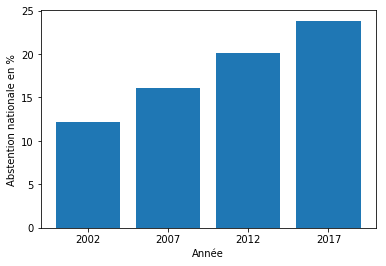

In [126]:
Année = ['2002', '2007', '2012', '2017']
val_2002 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2002].index[0]]
val_2007 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2007].index[0]]
val_2012 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2012].index[0]]
val_2017 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2017].index[0]]
Abstention = [val_2002, val_2007, val_2012, val_2017]
plt.bar(Année, Abstention)
plt.ylabel('Abstention nationale en %')
plt.xlabel('Année')
plt.show()

Abstention par département en 2017

Text(0.5,1,'Abstentions / dep 2017')

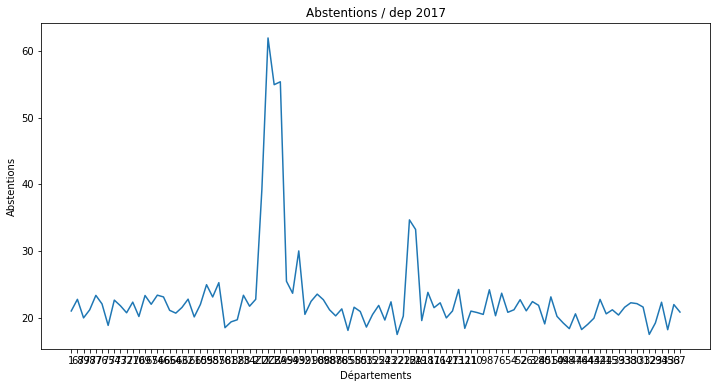

In [127]:
Départements = []
for dep in dep_abs['Code du département'][dep_abs['Année'] == 2017]:
    Départements.append(dep)
Abstentions = []
for ab in dep_abs['% Abs/Ins'][dep_abs['Année'] == 2017]:
    Abstentions.append(ab)

fig, axes = plt.subplots(figsize=(12,6))

axes.plot(Départements, Abstentions)
axes.set_xlabel('Départements')
axes.set_ylabel('Abstentions')
axes.set_title('Abstentions / dep 2017')

In [128]:
len(Départements)

100

Insérer ici les graphiques géographiques que vous avez vu en cours (vous serez plus rapide que moi)

# III Agrégation des données de tendances de votes par département
(Héléna)

On nomme les fichier sur lesquels on va extraire la tendance de vote des départements

In [129]:
trend_t1_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T2")
trend_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls', sheet_name = "Départements Tour 1")
trend_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls', sheet_name = "Départements Tour 2")
trend_t1_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T2")
trend_t1_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T2")



In [130]:
trend_t2_2007.head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Prénom,Voix,% Voix/Ins,% Voix/Exp,Sexe.1,Nom.1,Prénom.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,372951,53428,14.33,319523,85.67,13670,3.67,4.28,...,Nicolas,185174,49.65,60.54,F,ROYAL,Ségolène,120679,32.36,39.46
1,2,AISNE,377467,60071,15.91,317396,84.09,14388,3.81,4.53,...,Nicolas,161670,42.83,53.36,F,ROYAL,Ségolène,141338,37.44,46.64
2,3,ALLIER,259503,38826,14.96,220677,85.04,10809,4.17,4.90,...,Nicolas,102426,39.47,48.80,F,ROYAL,Ségolène,107442,41.40,51.20
3,4,ALPES DE HAUTE PROVENCE,118928,15140,12.73,103788,87.27,4744,3.99,4.57,...,Nicolas,52684,44.30,53.19,F,ROYAL,Ségolène,46360,38.98,46.81
4,5,HAUTES ALPES,103043,13349,12.95,89694,87.05,4075,3.95,4.54,...,Nicolas,45951,44.59,53.67,F,ROYAL,Ségolène,39668,38.50,46.33


On donne une valeur à tous les candidats aux élections 2002, 2007, 2012, 2017.

In [131]:
echelle = {"MACRON": 0 ,"HAMON": -5 ,"LASSALLE": 2 ,"ASSELINEAU": 9 ,"FILLON": 5 ,"JOLY": -7, "LE PEN" : 10, "SARKOZY": 6,"MÉLENCHON" : -9 ,"POUTOU" : -10,"ARTHAUD" : -10,"CHEMINADE" : -5,"BAYROU" : 0,"DUPONT-AIGNAN": 8,"HOLLANDE" : -4 , "MEGRET" : 10 ,"LEPAGE": 0,"GLUCKSTEIN": -7,"CHIRAC": 4,"TAUBIRA": -4,"SAINT-JOSSE": 6,"MAMERE": -8,"JOSPIN": -3,"BOUTIN": 3, "HUE": -2,"CHEVENEMENT": -3,"MADELIN": 3,"LAGUILLER": -10,"BESANCENOT": -8,"BUFFET": -10,"SCHIVARDI": -7,"BOVÉ": -9,"VOYNET": -5,"de VILLIERS": 8,"ROYAL": -2,"NIHOUS": 3}


On code une fonction qui calcule la tendance de vote d'un département, à partir du fichier où sont stoqués les résultats des élections, pour une année et un tour donnés.

In [142]:
def indice_tendance(df, code_dep,echelle,nb_cand):
    #trouver la ligne l du dep dans le dataset
    l = df.loc[df['Code du département'] == code_dep]
    i = 0 #indice de tendance
    tab = l.reset_index().values[0].tolist() # convert en liste

  
    for j in range(nb_cand):
        nom = tab[15+6*j] 
        val = echelle[nom]
        i += val * tab[19+6*j] 
        # les lignes ont toutes la meme structure : le premier nom est en colonne 14, puis le suivant en +6, +6, ...
        # on multiplie la note d'un candidat par le pourcentage de voix parmis les exprimés
    return i*0.01

#On note que pour 2002 :16 , 2007 :12 ,2012 :10 ,2017 :11 candidats

Par exemple, pour laa Corse au tour 1 en 2012 : 

In [144]:
indice_tendance(trend_t1_2012, '2A' ,echelle,10)

2.4876

Le fichier 2017 demande une modification de forme

In [134]:
trend_t1_2017.columns
trend_t1_2017.drop(["Nuls", "% Nuls/Ins", "% Nuls/Vot"],axis = 1, inplace = True)

In [151]:
df = pd.DataFrame([i for i in range(384)])

Pour chacune des 4 élections, on calcule la tedance pour chaque département, et on l'ajoute au dataset :

In [152]:
#on ajoute la colonne

indice_t1_2002 = []
indice_t1_2007 = []
indice_t1_2012 = []
indice_t1_2017 = []

liste_dep =trend_t1_2012['Code du département'].tolist()[:96]

for i in liste_dep: 
    indice_t1_2002 += [indice_tendance(trend_t1_2002, i, echelle,16)]
for i in liste_dep: 
    indice_t1_2007 += [indice_tendance(trend_t1_2007, i, echelle,12)]
for i in liste_dep: 
    indice_t1_2012 += [indice_tendance(trend_t1_2012, i, echelle,10)]
for i in liste_dep: 
    indice_t1_2017 += [indice_tendance(trend_t1_2017, i, echelle,11)]

indice = indice_t1_2002 + indice_t1_2007 + indice_t1_2012 + indice_t1_2017

df['indice_tendance'] = indice

print(df)

       0  indice_tendance
0      0           1.7450
1      1           1.2429
2      2           0.6263
3      3           1.0753
4      4           0.8014
5      5           2.4301
6      6           1.0798
7      7           1.5730
8      8           0.3521
9      9           1.8770
10    10           1.1476
11    11           0.8540
12    12           1.8522
13    13           0.6252
14    14           1.3655
15    15           0.5563
16    16           0.8597
17    17           0.9157
18    18           0.8329
19    19           1.8622
20    20           1.5001
21    21           1.0194
22    22          -0.0607
23    23           0.6822
24    24           0.6409
25    25           1.1087
26    26           1.3979
27    27           1.3335
28    28           1.4787
29    29          -0.0933
..   ...              ...
354  354           1.9366
355  355           2.4224
356  356           2.8127
357  357           0.9931
358  358           2.6911
359  359           1.8721
360  360    

Ajout de la feature "tendance du gouvernement au pouvoir avant l'éléction"

In [157]:
tendance_précédante = [3 for k in range(96)] + [3 for k in range(96)] + [6 for k in range(96)] + [-4 for k in range(96)]
#-4 car avant 2017,Hollande ie -4
df['tendance_précédante'] = tendance_précédante
print(df)


       0  indice_tendance  tendance_précédante
0      0           1.7450                    3
1      1           1.2429                    3
2      2           0.6263                    3
3      3           1.0753                    3
4      4           0.8014                    3
5      5           2.4301                    3
6      6           1.0798                    3
7      7           1.5730                    3
8      8           0.3521                    3
9      9           1.8770                    3
10    10           1.1476                    3
11    11           0.8540                    3
12    12           1.8522                    3
13    13           0.6252                    3
14    14           1.3655                    3
15    15           0.5563                    3
16    16           0.8597                    3
17    17           0.9157                    3
18    18           0.8329                    3
19    19           1.8622                    3
20    20     

Ajout de la feature ecart entre la tendance du departement et la tendance du gouvernement au pouvoir au moment de l'élection.

In [158]:
df['ecart_a_la_tendance'] = df['indice_tendance']- df['tendance_précédante'] 
print(df)


       0  indice_tendance  tendance_précédante  ecart_a_la_tendance
0      0           1.7450                    3              -1.2550
1      1           1.2429                    3              -1.7571
2      2           0.6263                    3              -2.3737
3      3           1.0753                    3              -1.9247
4      4           0.8014                    3              -2.1986
5      5           2.4301                    3              -0.5699
6      6           1.0798                    3              -1.9202
7      7           1.5730                    3              -1.4270
8      8           0.3521                    3              -2.6479
9      9           1.8770                    3              -1.1230
10    10           1.1476                    3              -1.8524
11    11           0.8540                    3              -2.1460
12    12           1.8522                    3              -1.1478
13    13           0.6252                    3  

# IV Ajout de certaines features socio-économiques

### Création d'un dataframe pour la pop active qu'on rajoute à dep_abs

In [53]:
dep_test = dep_abs

In [54]:
pop_active_dep = pd.read_excel('pop_active_dep.xls')
xls_1 = pd.ExcelFile('pop_active_dep.xls')
print(xls_1.sheet_names)

['Présentation', 'Documentation', 'Modifications_territoriales', 'DEP_1968', 'Feuil1', 'DEP_1975', 'DEP_1982', 'DEP_1990', 'DEP_1999', 'DEP_2007', 'DEP_2012', 'DEP_2017', 'COM_1968', 'COM_1975', 'COM_1982', 'COM_1990', 'COM_1999', 'COM_2007', 'COM_2012', 'COM_2017']


In [55]:
pop_active_dep_2017 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2017")
pop_active_dep_2012 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2012")
pop_active_dep_2007 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2007")

In [56]:
pop_active_dep_2017.columns

Index(['Région', 'Département', 'Libellé de\ndépartement',
       'Hommes\nActifs ayant un emploi\nRP2017', 'Hommes\nChômeurs\nRP2017',
       'Femmes\nActifs ayant un emploi\nRP2017', 'Femmes\nChômeurs\nRP2017'],
      dtype='object')

In [57]:
pop_active_dep_2017.rename(columns={'Hommes\nActifs ayant un emploi\nRP2017': 'Hommes actifs ayant un emplois', 'Hommes\nChômeurs\nRP2017': 'Hommes chômeurs', 'Femmes\nActifs ayant un emploi\nRP2017' : 'Femmes actifs ayant un emploi', 'Femmes\nChômeurs\nRP2017' : 'Femmes chomeurs'}, inplace = True)
pop_active_dep_2012.rename(columns={'Hommes\nActifs ayant un emploi\nRP2012': 'Hommes actifs ayant un emplois', 'Hommes\nChômeurs\nRP2012': 'Hommes chômeurs', 'Femmes\nActifs ayant un emploi\nRP2012' : 'Femmes actifs ayant un emploi', 'Femmes\nChômeurs\nRP2012' : 'Femmes chomeurs'}, inplace = True)
pop_active_dep_2007.rename(columns={'Hommes\nActifs ayant un emploi\nRP2007': 'Hommes actifs ayant un emplois', 'Hommes\nChômeurs\nRP2007': 'Hommes chômeurs', 'Femmes\nActifs ayant un emploi\nRP2007' : 'Femmes actifs ayant un emploi', 'Femmes\nChômeurs\nRP2007' : 'Femmes chomeurs'}, inplace = True)
pop_active_dep_2017['Année de contrôle'] = 2017
pop_active_dep_2012['Année de contrôle'] = 2012
pop_active_dep_2007['Année de contrôle'] = 2007


In [129]:
pop_active = pd.concat([pop_active_dep_2017, pop_active_dep_2012, pop_active_dep_2007], axis = 0)
pop_active.sort_values(by = 'Année de contrôle', ascending = False, inplace = True)
pop_active.reset_index(inplace = True)
pop_active.drop('index', axis = 1, inplace = True)
pop_active.drop(['Libellé de\ndépartement', 'Département', 'Région'], axis = 1, inplace = True)
pop_active.columns

Index(['Hommes actifs ayant un emplois', 'Hommes chômeurs',
       'Femmes actifs ayant un emploi', 'Femmes chomeurs',
       'Année de contrôle'],
      dtype='object')

In [59]:
dep_abs = pd.concat([dep_test, pop_active], axis = 1)
dep_abs.drop('Année de contrôle', axis = 1, inplace = True)
dep_abs.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat,% Abs/Ins,Hommes actifs ayant un emplois,Hommes chômeurs,Femmes actifs ayant un emploi,Femmes chomeurs
0,1,Ain,81507.0,19.60,415886.0,93130.0,22.39,2017.0,22.231967,25.432557,23.832262,20.995,113128.924731,9710.095614,102942.302884,11837.796424
1,68,Haut-Rhin,110496.0,21.00,526190.0,128800.0,24.48,2017.0,22.231967,25.432557,23.832262,22.740,103459.349176,11301.288792,99163.503139,13741.282958
2,79,Deux-Sèvres,51156.0,18.78,272385.0,57585.0,21.14,2017.0,22.231967,25.432557,23.832262,19.960,77478.125904,13467.847594,69181.374652,13684.273197
3,78,Yvelines,177485.0,18.66,951148.0,225177.0,23.68,2017.0,22.231967,25.432557,23.832262,21.170,72900.805673,6006.829282,67701.750400,7079.159822
4,77,Seine-et-Marne,183302.0,20.79,881558.0,228009.0,25.88,2017.0,22.231967,25.432557,23.832262,23.335,85678.258394,9915.171930,80875.471851,11474.043492


On rajoute des colonnes sur la moyenne des chômeurs Femmes, Hommes et totales

In [60]:
dep_abs['pop active ayant un emploi'] = dep_abs[['Hommes actifs ayant un emplois', 'Femmes actifs ayant un emploi']].mean(axis = 1)
dep_abs['pop chômeurs'] = dep_abs[['Hommes chômeurs', 'Femmes chomeurs']].mean(axis = 1)
dep_abs.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat,% Abs/Ins,Hommes actifs ayant un emplois,Hommes chômeurs,Femmes actifs ayant un emploi,Femmes chomeurs,pop active ayant un emploi,pop chômeurs
0,1,Ain,81507.0,19.60,415886.0,93130.0,22.39,2017.0,22.231967,25.432557,23.832262,20.995,113128.924731,9710.095614,102942.302884,11837.796424,108035.613808,10773.946019
1,68,Haut-Rhin,110496.0,21.00,526190.0,128800.0,24.48,2017.0,22.231967,25.432557,23.832262,22.740,103459.349176,11301.288792,99163.503139,13741.282958,101311.426157,12521.285875
2,79,Deux-Sèvres,51156.0,18.78,272385.0,57585.0,21.14,2017.0,22.231967,25.432557,23.832262,19.960,77478.125904,13467.847594,69181.374652,13684.273197,73329.750278,13576.060396
3,78,Yvelines,177485.0,18.66,951148.0,225177.0,23.68,2017.0,22.231967,25.432557,23.832262,21.170,72900.805673,6006.829282,67701.750400,7079.159822,70301.278037,6542.994552
4,77,Seine-et-Marne,183302.0,20.79,881558.0,228009.0,25.88,2017.0,22.231967,25.432557,23.832262,23.335,85678.258394,9915.171930,80875.471851,11474.043492,83276.865122,10694.607711


### Création d'un dataframe pour la population par grande classe d'âge (très important)

In [61]:
age_pop_dep = pd.read_excel('age_pop_dep.xlsx')
xls_1 = pd.ExcelFile('age_pop_dep.xlsx')
print(xls_1.sheet_names)

['À savoir', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', 'Feuil1', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975']


In [62]:
age_pop_dep_2017 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2017")
age_pop_dep_2012 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2012")
age_pop_dep_2007 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2007")
age_pop_dep_2002 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2002")
age_pop_dep_2002.head()
# galère faudrait réussir à faire un multi index

,Départements,Unnamed: 1,Ensemble,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Hommes,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Femmes,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total,0 à 19 ans,20 à 39 ans,40 à 59 ans,60 à 74 ans,75 ans et plus,Total
1,01,Ain,146640,145248,146194,62718,34816,535616,75084,73352,73898,30174,12797,265305,71556,71896,72296,32544,22019,270311
2,02,Aisne,145835,138617,143369,69349,39614,536784,74255,69835,72156,31407,14189,261842,71580,68782,71213,37942,25425,274942
3,03,Allier,72876,80217,94450,58224,38588,344355,37362,40573,46755,26366,14279,165335,35514,39644,47695,31858,24309,179020
4,04,Alpes-de-Haute-Provence,34434,33536,40312,23687,13781,145750,17741,16584,20105,11364,5309,71103,16693,16952,20207,12323,8472,74647


### Création d'un dataframe sur les résultats par bureau de vote dans chaque département

In [63]:
bv_t1t2_2002 = pd.read_csv('bv_t1t2_2002', delimiter = ';')
bv_t1t2_2007 = pd.read_csv('bv_t1t2_2007', delimiter = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [64]:
bv_t1t2_2007 = bv_t1t2_2007.rename_axis('Vrai tour').reset_index()
bv_t1t2_2002 = bv_t1t2_2002.rename_axis('Vrai tour').reset_index()

In [65]:
bv_t1t2_2007.rename(columns = {'Tour' : 'Code département', 'Coded�partement' : 'Code commune', 'Codecommune' : 'Nom commune', 'Nomdelacommune,N�bureaudevote' : 'Numéro bureau de vote'}, inplace = True)
bv_t1t2_2002.rename(columns = {'Tour' : 'Code département', 'Coded�partement' : 'Code commune', 'Codecommune' : 'Nom commune', 'Nomdelacommune,N�bureaudevote' : 'Numéro bureau de vote'}, inplace = True)

In [66]:
bv_t1t2_2007.rename(columns = {'Vrai tour' : 'Tour'}, inplace = True)
bv_t1t2_2002.rename(columns = {'Vrai tour' : 'Tour'}, inplace = True)

In [67]:
bv_t1t2_2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918638 entries, 0 to 918637
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Tour                   918638 non-null  int64 
 1   Code département       918638 non-null  object
 2   Code commune           918638 non-null  int64 
 3   Nom commune            918638 non-null  object
 4   Numéro bureau de vote  918638 non-null  object
 5   Inscrits               918638 non-null  int64 
 6   Votants                918638 non-null  int64 
 7   Exprim�s               918638 non-null  int64 
 8   N�deputducandidat      918638 non-null  int64 
 9   Nomcandidat            918638 non-null  object
 10  Pr�nomcandidat         918638 non-null  object
 11  Codesiglecandidat      918638 non-null  object
 12  Nombredevoixcandidat   918638 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 91.1+ MB


In [68]:
bv_t1t2_2007['Code département'] = bv_t1t2_2007['Code département'].astype('string')

In [69]:
bv_t1t2_2007['Code département'].unique()[0:101]

<StringArray>
[ '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10',
 ...
 '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM']
Length: 101, dtype: string

In [70]:
dic_2007 = {}
for code in bv_t1t2_2007['Code département'].unique()[0:101]:
    dic_2007[code] = len(bv_t1t2_2007[bv_t1t2_2007['Code département'] == code]['Numéro bureau de vote'].value_counts())

In [71]:
bv_t1t2_2002['Code département'] = bv_t1t2_2002['Code département'].astype('string')

In [72]:
bv_t1t2_2002['Code département'].unique()[0:100]

<StringArray>
[ '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13',
 '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25',
 '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
 '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
 '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
 '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
 '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
 '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD']
Length: 100, dtype: string

In [145]:
dic_2002 = {}
for code in bv_t1t2_2002['Code département'].unique()[0:100]:
    dic_2002[code] = len(bv_t1t2_2002[bv_t1t2_2002['Code département'] == code]['Numéro bureau de vote'].value_counts())
dic_2002['ZM'] = 'NaN'

In [112]:
bv_t2_2017 = pd.read_csv('bv_t2_2017', delimiter = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [115]:
bv_t2_2017.drop(['Code du d�partement', 'Libell� du d�partement',
       'Code de la circonscription', 'Libell� de la circonscription',
       'Code de la commune', 'Libell� de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprim�s', '% Exp/Ins', '% Exp/Vot', 'N�Panneau', 'Sexe',
       'Nom', 'Pr�nom', 'Voix', '% Voix/Ins', '% Voix/Exp'], axis = 1, inplace = True)

In [116]:
bv_t2_2017 = bv_t2_2017.reset_index()

In [130]:
bv_t2_2017.rename(columns = {'level_0' : 'Code département', 'level_1':'Libellé département', 'level_2':'Numéro circonscription',
                            'level_3':'Nom circonscription', 'level_4':'Numéro commune', 'level_5':'Nom commun', 'level_6':'Numéro bv'}, inplace = True)

,Code département,Libellé département,Numéro circonscription,Nom circonscription,Numéro commune,Nom commun,Numéro bv
0,01,Ain,4,4�me circonscription,1,L'Abergement-Cl�menciat,0001
1,01,Ain,5,5�me circonscription,2,L'Abergement-de-Varey,0001
2,01,Ain,5,5�me circonscription,4,Amb�rieu-en-Bugey,0001
3,01,Ain,5,5�me circonscription,4,Amb�rieu-en-Bugey,0002
4,01,Ain,5,5�me circonscription,4,Amb�rieu-en-Bugey,0003


In [138]:
bv_t2_2017['Code département'] = bv_t2_2017['Code département'].astype('string')

In [142]:
bv_t2_2017['Code département'].unique()[0:101]

<StringArray>
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
 ...
 '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM']
Length: 101, dtype: string

In [143]:
dic_2017 = {}
for code in bv_t2_2017['Code département'].unique()[0:101]:
    dic_2017[code] = len(bv_t2_2017[bv_t2_2017['Code département'] == code]['Numéro bv'].value_counts())

In [167]:
bv_t1t2_2012 = pd.read_csv('bv_t1t2_2012', delimiter = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [168]:
bv_t1t2_2012 = bv_t1t2_2012.reset_index()
bv_t1t2_2012.head()

,level_0,level_1,Tour,Coded�partement,Codecommune,Nomdelacommune,N�bureaudevote,Inscrits,Votants,Exprim�s,N�deputducandidat,Nomcandidat,Pr�nomcandidat,Codesiglecandidat,Nombredevoixcandidat
0,1,ZA,101,Les Abymes,1,1,1,476,266,249,2,JOLY,Eva,JOLY,7
1,1,ZA,101,Les Abymes,1,1,1,476,266,249,3,LE PEN,Marine,LEPE,12
2,1,ZA,101,Les Abymes,1,1,1,476,266,249,4,SARKOZY,Nicolas,SARK,50
3,1,ZA,101,Les Abymes,1,1,1,476,266,249,5,M�LENCHON,Jean-Luc,MELE,11
4,1,ZA,101,Les Abymes,1,1,1,476,266,249,9,BAYROU,Fran�ois,BAYR,5


In [169]:
bv_t1t2_2012.columns

Index(['level_0', 'level_1', 'Tour', 'Coded�partement', 'Codecommune',
       'Nomdelacommune', 'N�bureaudevote', 'Inscrits', 'Votants', 'Exprim�s',
       'N�deputducandidat', 'Nomcandidat', 'Pr�nomcandidat',
       'Codesiglecandidat', 'Nombredevoixcandidat'],
      dtype='object')

In [170]:
bv_t1t2_2012.drop(['Codecommune',
       'Nomdelacommune','Inscrits', 'Votants', 'Exprim�s',
       'N�deputducandidat', 'Nomcandidat', 'Pr�nomcandidat',
       'Codesiglecandidat', 'Nombredevoixcandidat'], axis = 1, inplace = True)

In [171]:
bv_t1t2_2012.head()

,level_0,level_1,Tour,Coded�partement,N�bureaudevote
0,1,ZA,101,Les Abymes,1
1,1,ZA,101,Les Abymes,1
2,1,ZA,101,Les Abymes,1
3,1,ZA,101,Les Abymes,1
4,1,ZA,101,Les Abymes,1


In [172]:
bv_t1t2_2012.rename(columns = {'level_0':'Tour', 'level_1':'Code département', 'Tour':'Code commune',
                              'Coded�partement':'Nom commune', 'N�bureaudevote': 'Numéro bv'}, inplace = True)

In [173]:
bv_t1t2_2012.head()

,Tour,Code département,Code commune,Nom commune,Numéro bv
0,1,ZA,101,Les Abymes,1
1,1,ZA,101,Les Abymes,1
2,1,ZA,101,Les Abymes,1
3,1,ZA,101,Les Abymes,1
4,1,ZA,101,Les Abymes,1


In [174]:
bv_t1t2_2012['Code département'] = bv_t1t2_2012['Code département'].astype('string')

In [179]:
type(bv_t1t2_2012['Code département'].unique())

pandas.core.arrays.string_.StringArray

In [ ]:
list_dep = bv_t1t2_2012['Code département'].unique().tolist().remove('ZN', 'ZP', 'ZS', 'ZW', 'ZX')